## Forward stepwise variable selection for logistic regression

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/xingkaiwu/OneDrive - York University/MBAN Winter/MBAN 6400/Datacamp Predictive Analytics in Python/basetable_ex2_4.csv')

In [19]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
def auc(variables, target, basetable):
    X = basetable[variables]
    y = basetable[target]
    logreg = linear_model.LogisticRegression(max_iter=1000)
    logreg.fit(X, y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(y, predictions)
    return(auc)

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable

# df: dataframe, target: target variable name with " "
def forward_stepwise(df,target,number_iterations):

    # Find the candidate variables
    candidate_variables = list(df.columns.values)
    candidate_variables.remove(target)

    # Initialize the current variables
    current_variables = []

    # The forward stepwise variable selection procedure
    for i in range(0, number_iterations):
        next_variable = next_best(current_variables, candidate_variables, [target], df)
        current_variables = current_variables + [next_variable]
        candidate_variables.remove(next_variable)
        print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
    print(current_variables)

def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    logreg = linear_model.LogisticRegression(max_iter=1000)
    
    # Fit the model on train data
    logreg.fit(X_train, Y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [17]:
basetable = data[['target', 'gender_F', 'income_high', 'income_low', 'country_USA',
       'country_India', 'country_UK', 'age', 'time_since_last_gift',
       'time_since_first_gift', 'max_gift', 'min_gift', 'mean_gift',
       'number_gift']]

forward_stepwise(basetable,"target",5)

Variable added in step 1 is max_gift.
Variable added in step 2 is number_gift.
Variable added in step 3 is time_since_last_gift.
Variable added in step 4 is mean_gift.
Variable added in step 5 is age.
['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age']


In [6]:
# Create dataframes with variables and target
X = basetable.drop('target', 1)
y = basetable["target"]

# Carry out 70-30 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

 # Apply the auc_train_test function
auc_train, auc_test = auc_train_test(['age', 'gender_F'], ["target"], train, test)
print(round(auc_train,2))
print(round(auc_test,2))

0.55
0.53


/var/folders/9s/zz7k8h2949d__gv0rmbn3yj80000gn/T/ipykernel_31057/2139685592.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = basetable.drop('target', 1)
/Users/xingkaiwu/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


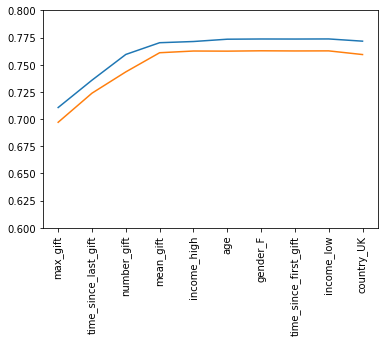

In [20]:
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
variables = ['max_gift',
 'time_since_last_gift',
 'number_gift',
 'mean_gift',
 'income_high',
 'age',
 'gender_F',
 'time_since_first_gift',
 'income_low',
 'country_UK']
 
for v in variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, ["target"], train, test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()